In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
df = pd.read_excel('Sales_Data.xlsx')

In [4]:
sales = df
sales


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [5]:
sales.shape

(113036, 18)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

**Data Cleaning**

In [7]:
sales.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113031    False
113032    False
113033    False
113034    False
113035    False
Length: 113036, dtype: bool

In [8]:
sales.duplicated().sum()

1000

In [9]:
sales.loc[sales.duplicated()]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1021,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1091,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1093,2013-10-24,24,October,2013,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
1095,2015-10-24,24,October,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10,4,4,8
1193,2016-01-15,15,January,2016,42,Adults (35-64),M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5,29,28,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111029,2014-02-18,18,February,2014,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,854,1482,2336
111031,2016-02-18,18,February,2016,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,854,1482,2336
111265,2014-04-27,27,April,2014,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,378,1482,1860
111953,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735


In [10]:
sales.query('Product_Category == "Accessories"').head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [11]:
#alternative way to delete duplicated values
sales.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [12]:
#alternative way to delete duplicated values
sales.duplicated(subset = ['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue']).sum()

1000

In [13]:
#Dropping some duplicated values permanently
sales.drop_duplicates(inplace=True)

In [14]:
sales.shape

(112036, 18)

In [15]:
#finding a null rows and columns.
sales.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [16]:
#How many bike orders were made from United Kingdom?
sales.loc[(sales['Country'] == 'United Kingdom') & (sales['Product_Category'] == 'Bikes')].shape[0]

3485

**Exploratory Data Analysis**



1. Which year were the highest Order_Quantity per Products Made?

In [17]:
ax1_qty_order_per_products = sales.groupby('Year')['Order_Quantity'].sum()
ax1_qty_order_per_products

Year
2011      5254
2012      5328
2013    292144
2014    376231
2015    286897
2016    367851
Name: Order_Quantity, dtype: int64

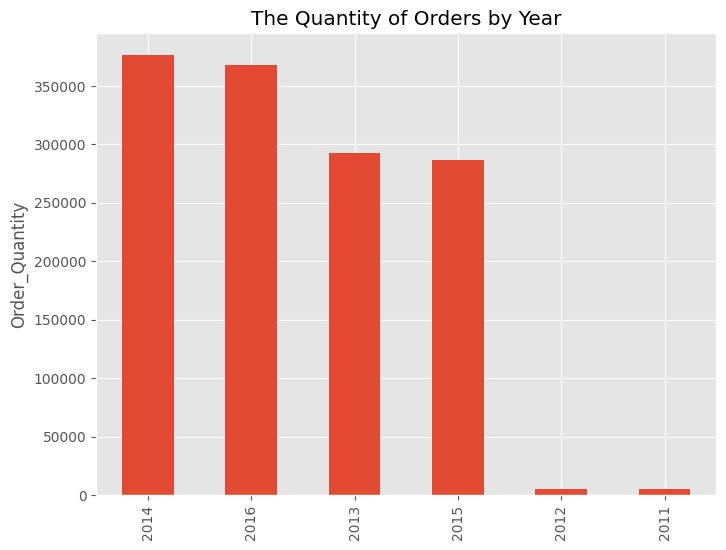

In [18]:
ax2 = ax1_qty_order_per_products.sort_values(ascending=False) \
      .plot(kind='bar', figsize=(8,6)) 
plt.title('The Quantity of Orders by Year')
ax2.set_xlabel('')
ax2.set_ylabel('Order_Quantity')
plt.show()

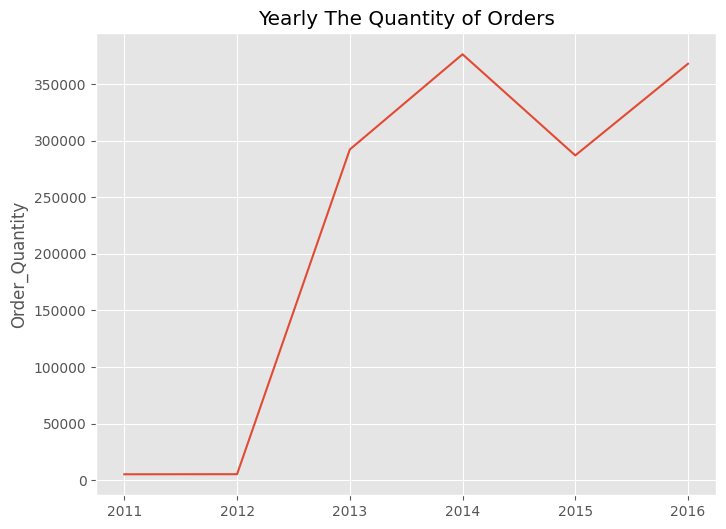

In [19]:
ax2 = ax1_qty_order_per_products.plot(kind='line', figsize=(8,6)) 
plt.title('Yearly The Quantity of Orders')
ax2.set_xlabel('')
ax2.set_ylabel('Order_Quantity')
plt.show()

In [20]:
#The Average Order Per Year
Time_Years = 6 
Avg_Order_Per_Year = (ax1_qty_order_per_products.sum() / Time_Years)
Avg_Order_Per_Year 

222284.16666666666

2. The Top 5 Sold Products in The Last 6 Year?

In [21]:
ax1_Sold_Product = sales['Product'].value_counts()[:5]
ax1_Sold_Product

Water Bottle - 30 oz.    10641
Patch Kit/8 Patches      10256
Mountain Tire Tube        6688
AWC Logo Cap              4358
Sport-100 Helmet, Red     4218
Name: Product, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

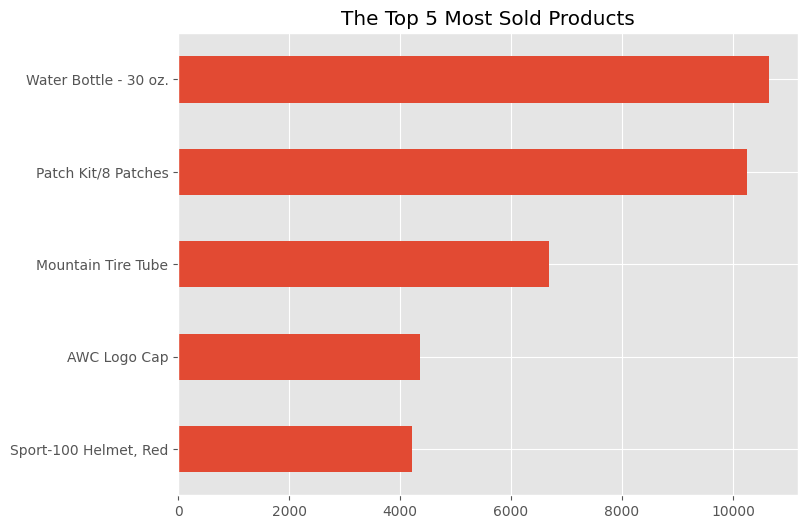

In [22]:
ax2_Sold_Product = ax1_Sold_Product.sort_values(ascending=True) \
            .plot(kind='barh', figsize=(8,6))
plt.title('The Top 5 Most Sold Products')
ax2_Sold_Product.set_xlabel('')
ax2_Sold_Product.set_ylabel('')
plt.show

3. Which Products Had The Highest Order_Quantity?

In [23]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [24]:
ax3 = sales.groupby('Product')['Order_Quantity'].sum()[:5]
ax3

Product
AWC Logo Cap              67316
All-Purpose Bike Stand     2391
Bike Wash - Dissolver     27579
Classic Vest, L            4651
Classic Vest, M            4876
Name: Order_Quantity, dtype: int64

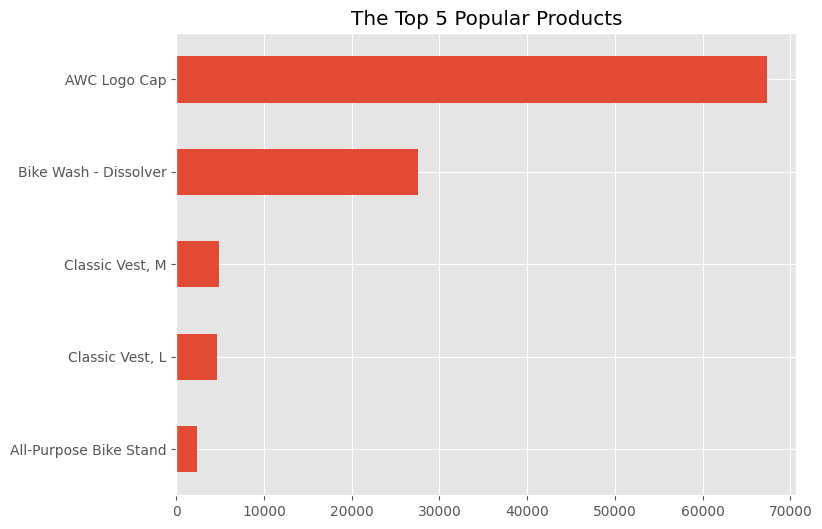

In [25]:
ax4 = ax3.sort_values(ascending=True) \
     .plot(kind='barh', figsize=(8,6)) 
plt.title('The Top 5 Popular Products')
ax4.set_ylabel('')
plt.show()


4. Which The Product Category Had Values Above The Average and The Maximum Values?



In [26]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [27]:
nmbr_order_product_Category = sales.groupby(['Year', 'Product_Category'])['Order_Quantity'].sum()
avg_order_product_Category = nmbr_order_product_Category.mean()
print('The Average Number of Order is', avg_order_product_Category)

prodcategory_and_year = sales.groupby(['Year', 'Product_Category'])['Order_Quantity'].sum().unstack()

def style_negative(v,props=''):
    return props if v > avg_order_product_Category else None
s2 = prodcategory_and_year.style.applymap(style_negative, props='color:blue;')\
.applymap (lambda v:'opacity = 20%;'if (v < 0.3) and (v > -0.3) else None)
s2         

The Average Number of Order is 95264.64285714286


Product_Category,Accessories,Bikes,Clothing
Year,,,
2011,nan,5254.000000,nan
2012,nan,5328.000000,nan
2013,228560.000000,5650.000000,57934.000000
2014,300343.000000,4552.000000,71336.000000
2015,222278.000000,8520.000000,56099.000000
2016,291610.000000,6897.000000,69344.000000


In [28]:
def highlight_max(s, props=''):
   return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

Product_Category,Accessories,Bikes,Clothing
Year,,,
2011,nan,5254.000000,nan
2012,nan,5328.000000,nan
2013,228560.000000,5650.000000,57934.000000
2014,300343.000000,4552.000000,71336.000000
2015,222278.000000,8520.000000,56099.000000
2016,291610.000000,6897.000000,69344.000000


5. Which Countries Had The Highest Revenue?

In [29]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [30]:
Ax1_Country_And_Rev = sales.groupby(['Country'])['Revenue'].sum()
Ax1_Country_And_Rev

Country
Australia         21196395
Canada             7906182
France             8414745
Germany            8956724
United Kingdom    10575628
United States     27777098
Name: Revenue, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

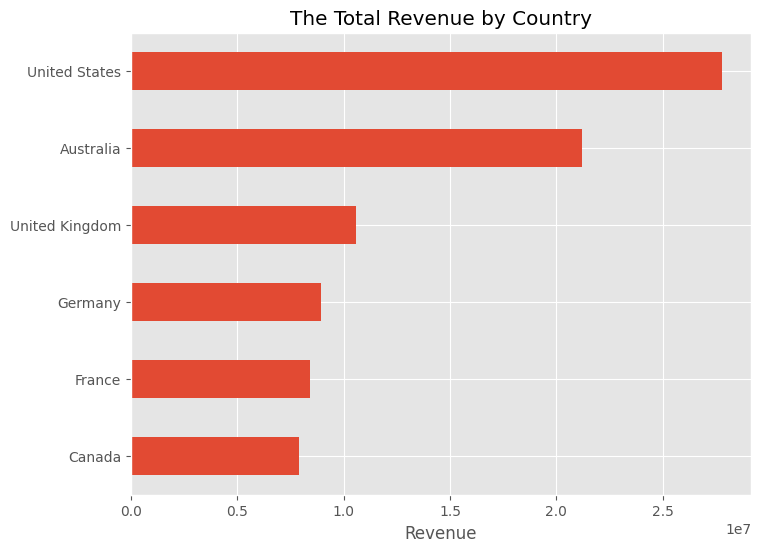

In [31]:
Ax2_Country_And_Rev = Ax1_Country_And_Rev.sort_values(ascending=True) \
                      .plot(kind='barh', figsize=(8,6))
plt.title('The Total Revenue by Country')
Ax2_Country_And_Rev.set_ylabel("")
Ax2_Country_And_Rev.set_xlabel("Revenue")
plt.show

6. Finding the revenue growth by country

In [32]:
sales.groupby(['Year','Country'])['Revenue'].sum() \
                      .unstack()

Country,Australia,Canada,France,Germany,United Kingdom,United States
Year,,,,,,
2011,2527984,787379,946624,833603,823481,3032895
2012,2545407,827590,962153,835188,834885,3128572
2013,4074626,1440361,1425103,1446051,1853657,4877529
2014,2782540,1464413,1409072,1696626,1986340,4701201
2015,5687580,1728374,1871282,1925113,2476886,6256468
2016,3578258,1658065,1800511,2220143,2600379,5780433


<function matplotlib.pyplot.show(close=None, block=None)>

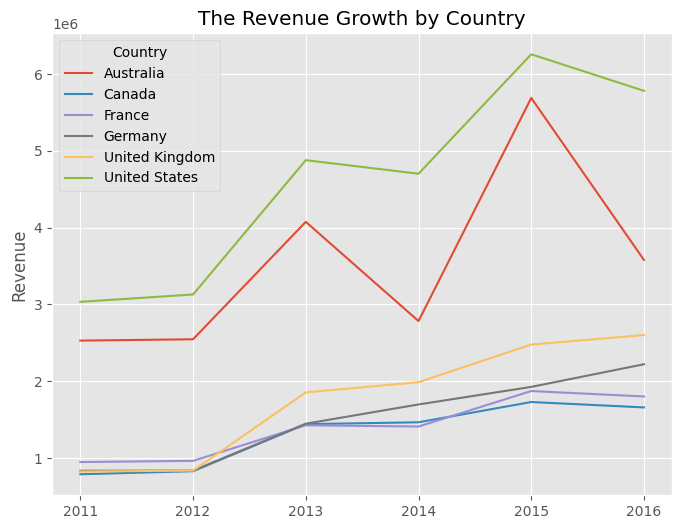

In [33]:
Ax1_Country_And_Rev = sales.groupby(['Year','Country'])['Revenue'].sum() \
                      .unstack()
Ax2_Country_And_Rev = Ax1_Country_And_Rev.plot(kind='line', figsize=(8,6), title = 'The Revenue Growth by Country')
Ax2_Country_And_Rev.set_ylabel("Revenue")
Ax2_Country_And_Rev.set_xlabel("")
plt.show

In [34]:
sales.shape[0]

112036

7. Find The Customer Demographic Based on Age_Group?


In [35]:
sales.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [36]:
Total_Sales_Record = sales.shape[0]

In [37]:
sales['Age_Group'].value_counts()

Adults (35-64)          55358
Young Adults (25-34)    38299
Youth (<25)             17660
Seniors (64+)             719
Name: Age_Group, dtype: int64

In [38]:
Total_Age_Group = sales['Age_Group'].value_counts()
Percent_Age_Group = (Total_Age_Group / Total_Sales_Record) * 100
Percent_Age_Group

Adults (35-64)          49.410904
Young Adults (25-34)    34.184548
Youth (<25)             15.762791
Seniors (64+)            0.641758
Name: Age_Group, dtype: float64

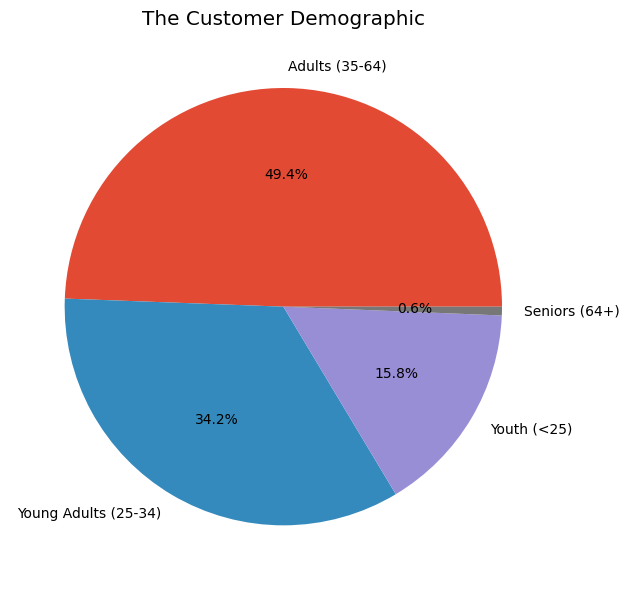

In [39]:
ax1_Percent_Age_Group = (Total_Age_Group / Total_Sales_Record) * 100
ax2_Percent_Age_Group = ax1_Percent_Age_Group

x = [49.410904, 34.184548,  15.762791, 0.641758]
my_labels = ['Adults (35-64)', 'Young Adults (25-34)', 'Youth (<25)', 'Seniors (64+)']

fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.pie(x, labels= my_labels, autopct='%.1f%%')
ax2.set_title('The Customer Demographic')
plt.tight_layout()

8. Find Yearly Profit, Cost, and Revenu?

In [40]:
ax1_Cost_Profit_Rev = sales.groupby('Year').sum()
[['Cost', 'Profit', 'Revenue']]
ax2_Cost_Profit_Rev = ax1_Cost_Profit_Rev.drop(columns=['Day', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price'])

<ipython-input-40-e137279b09bf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax1_Cost_Profit_Rev = sales.groupby('Year').sum()


<function matplotlib.pyplot.show(close=None, block=None)>

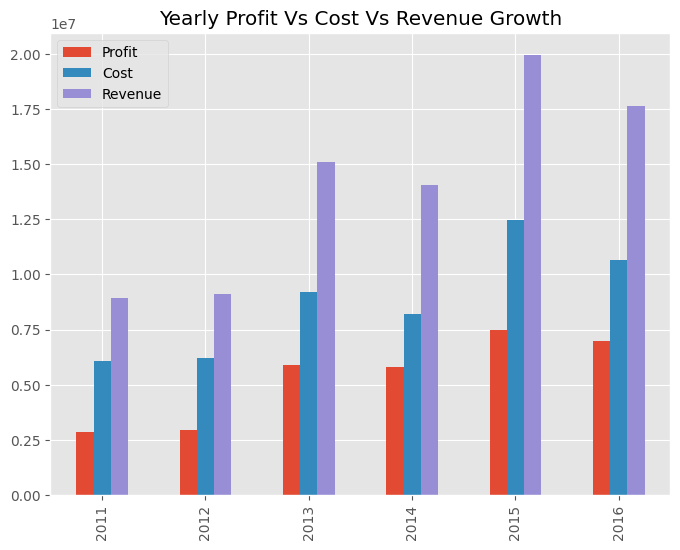

In [51]:
ax3_Cost_Profit_Rev = ax2_Cost_Profit_Rev.plot(kind='bar', 
                                                 figsize=(8,6), 
                                                 title = 'Yearly Profit Vs Cost Vs Revenue Growth')
ax3_Cost_Profit_Rev.set_xlabel('')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

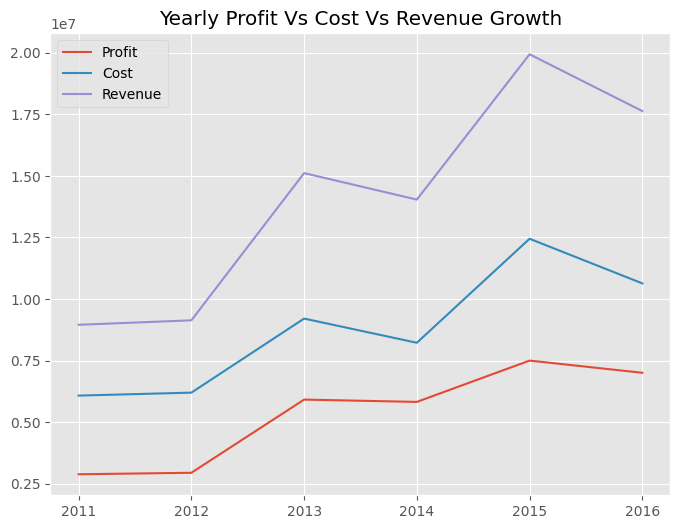

In [52]:
ax3_Cost_Profit_Rev = ax2_Cost_Profit_Rev.plot(kind='line', 
                                                 figsize=(8,6), 
                                                 title = 'Yearly Profit Vs Cost Vs Revenue Growth')
ax3_Cost_Profit_Rev.set_xlabel('')
plt.show

9. How Many Sales Were Made Between October - December 2015?**

In [43]:
cond = (sales['Year'] == 2015) & (sales['Month'].isin(['October', 'September', 'November', 'December']))
sales.loc[cond].shape[0]

17317

10. How many bike orders were made from United Kingdom?

In [44]:
sales.loc[(sales['Country'] == 'United Kingdom') & (sales['Product_Category'] == 'Bikes')].shape[0]

3485

**Statistics**

In [45]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [46]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


<function matplotlib.pyplot.show(close=None, block=None)>

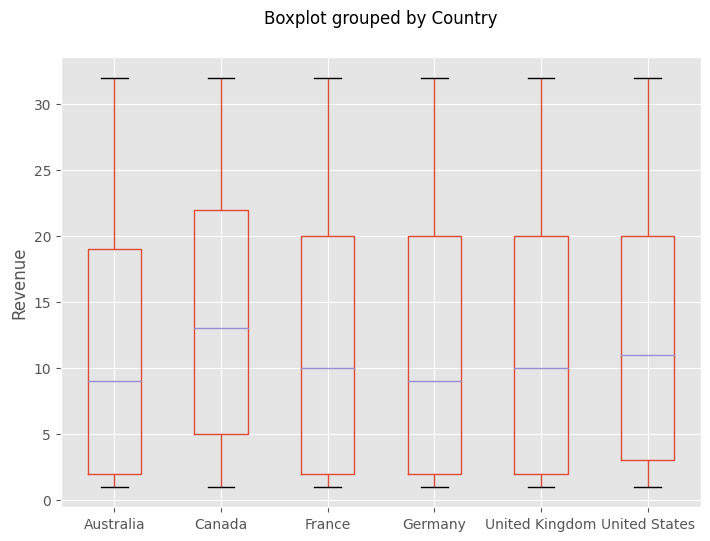

In [47]:
ax1_boxplot_Order_Country = sales[['Order_Quantity', 'Country']].boxplot(by='Country', figsize=(8,6))
plt.title('')
ax1_boxplot_Order_Country.set_xlabel('')
ax1_boxplot_Order_Country.set_ylabel('Revenue')
plt.show

Text(0.5, 0, '')

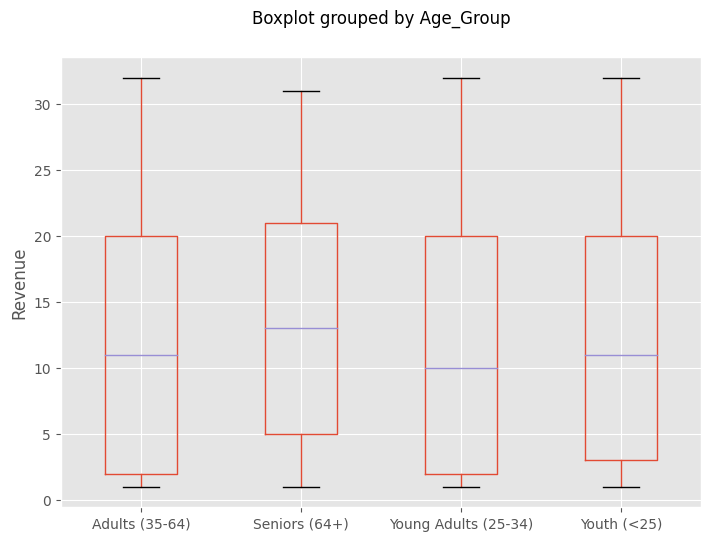

In [48]:
ax1_boxplot_Revenue_Country = sales[['Order_Quantity', 'Age_Group']].boxplot(by='Age_Group', figsize=(8,6))
plt.title('')
ax1_boxplot_Revenue_Country.set_ylabel('Revenue')
ax1_boxplot_Revenue_Country.set_xlabel('')

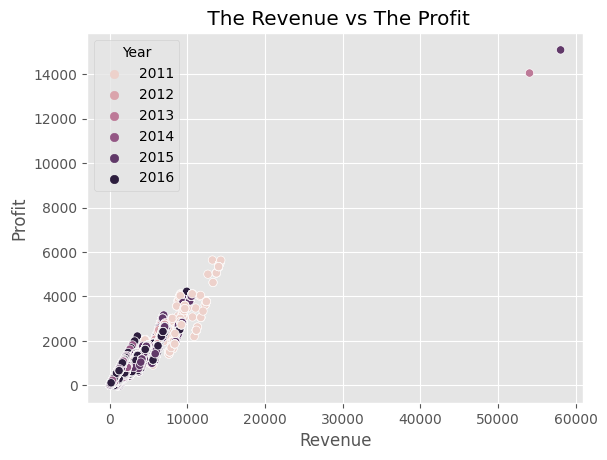

In [49]:
ax_sctr_revenue_profit = sns.scatterplot(x="Revenue", 
          y = "Profit",
          hue ="Year",
          data = sales)
ax_sctr_revenue_profit.set_title(" The Revenue vs The Profit")
plt.show()

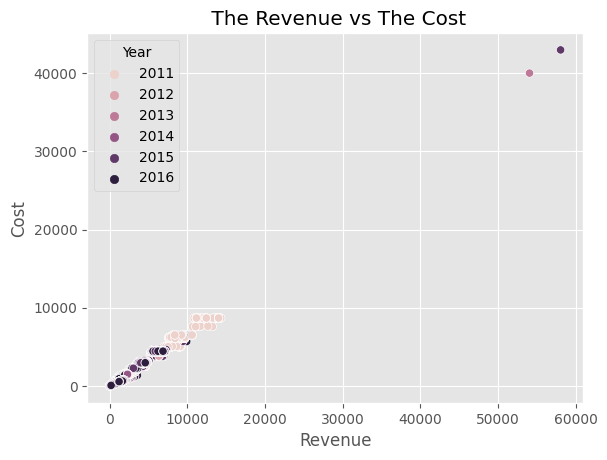

In [53]:
ax_sctr_revenue_cost = sns.scatterplot(x="Revenue", 
          y = "Cost",
          hue ="Year",
          data = sales)
ax_sctr_revenue_cost.set_title(" The Revenue vs The Cost")
plt.show()

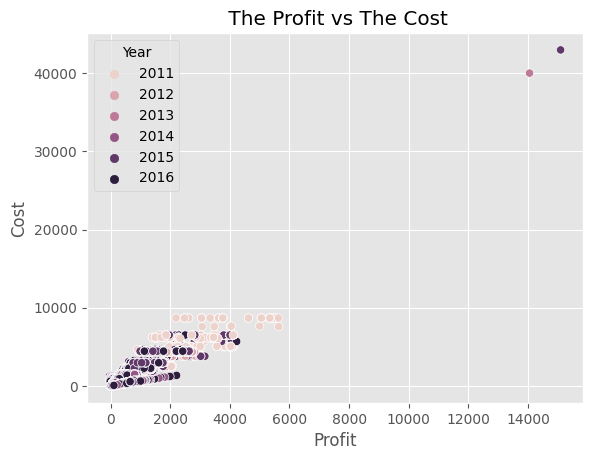

In [50]:
ax_sctr_profit_cost = sns.scatterplot(x="Profit", 
          y = "Cost",
          hue ="Year",
          data = sales)
ax_sctr_profit_cost.set_title(" The Profit vs The Cost")
plt.show()